## M. Amintoosi
## کاوش الگوهای پرتکرار
استخراج قوانین انجمنی

In [111]:
import pandas as pd
import numpy as np
# from orangecontrib.associate.fpgrowth import *
# from itertools import tee
# from tqdm import tqdm
import networkx as nx
import math 
from sklearn import preprocessing
import ml_metrics
# import recmetrics

df = pd.read_excel(r'data/403.xlsx', engine="openpyxl") 
# df = pd.read_excel(r'results/bestPlants_min_freq_10.xlsx', header=None) 
# bf_plants = list(df[0])
# print (list(df[0]))
# metabolitNames = df.head(0).to_string()
plantNames = list(df.head(0)) #df.keys()#
len(plantNames)

403

In [2]:
numpy_matrix = df.values
d =  numpy_matrix.transpose()
T = [[x for x in row if str(x) != 'nan'] for row in d]
# T = [[str(i)[3:] for i in row ] for row in d]
# T = [[int(i) for i in row if i != ''] for row in T]
print(T[0][:20])
n_plants = len(T)
n_plants

['C00001036', 'C00002647', 'C00005548', 'C00005872', 'C00008210', 'C00008817', 'C00013297', 'C00013867', 'C00013974', 'C00014320', 'C00046784']


403

In [3]:
# مشخص کردن تعداد متابولیت‌های مجزا
from itertools import chain
newlist = list(chain(*T))
print(len(np.unique(newlist)))
newlist[0]

7416


'C00001036'

## ایجاد ماتریس مجاروتی گرافی که نودهای آن گیاهان و وزن لبه ها تعداد متابولیت های مشترک است

ابتدا کیسه کلمات صفر و یکی را ایجاد می‌کنیم

In [4]:
corpus = [None] * len(T)
for i in range(len(T)):
    listToStr = ' '.join([str(elem) for elem in T[i]]) 
    corpus[i] = listToStr
print(type(corpus))
print(corpus[0])
print(len(corpus[0]))

<class 'list'>
C00001036 C00002647 C00005548 C00005872 C00008210 C00008817 C00013297 C00013867 C00013974 C00014320 C00046784
109


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern = r"(?u)\b\w+\b")
X = vectorizer.fit_transform(corpus)
print(X.shape)
# print(X.toarray())
bow = X.toarray()
print(sum(bow[0] & bow[2]))
featureNames = vectorizer.get_feature_names()
type(featureNames)
print(featureNames[:5])

(403, 7416)
1
['c00000001', 'c00000003', 'c00000004', 'c00000005', 'c00000007']


In [39]:
# ایجاد ماتریس مجاورتی
M = np.zeros((n_plants,n_plants))
for i in range(n_plants):
    for j in range(n_plants):
        M[i,j] = sum(bow[i] & bow[j])
Mw = np.copy(M)        

In [37]:
# ایجاد ماتریس گراف صقر و یکی که لبه ها بدون وزن هستند
# M01 = np.copy(M)
# M01[M>1] = 1

# M01 = np.zeros((n_plants,n_plants))
# for i in range(n_plants):
#     for j in range(n_plants):
#         M01[i,j] = 1 if(sum(bow[i] & bow[j])>0) else 0

print(M.sum(),M01.sum())
# sum(M==1)
        # if(sum(bow[i] & bow[j])>1):
        #     print(i,j)

62964.0 22361.0


In [38]:
G_fileName = "results/M01"+".npy"
with open(G_fileName, 'wb') as f:
  np.save(f,M01)

In [3]:
# G_fileName = "results/M"+".npy"
# with open(G_fileName, 'rb') as f:
#   M = np.load(f)

403

In [7]:
import xlsxwriter 
workbook = xlsxwriter.Workbook("results/Graph_403.xlsx") 
worksheet = workbook.add_worksheet() 
row = 0

for i in range(len(M)):
    for j in range(len(M)):
      if(M[i,j] != 0):
        worksheet.write(row, 0, plantNames[i]) 
        worksheet.write(row, 1, plantNames[j]) 
        worksheet.write(row, 2, M[i,j]) 
        row += 1
      
workbook.close() 

In [8]:
# minFreq = 10
# itemsets = frequent_itemsets(T, minFreq)
# freqIS_list = list(itemsets)
# n_freqIS = len(freqIS_list)
# print(n_freqIS)

In [9]:
# minFreq = 10
# G_fileName = "results/"+str(minFreq)+"_G"+".npy"
# with open(G_fileName, 'rb') as f:
# #   G = np.load(f)
# #   Gw = np.load(f)
# #   featureNames = np.load(f)
#   plantNames = np.load(f)
# #   bow = np.load(f)

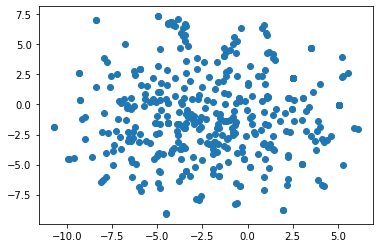

In [10]:
from sklearn.manifold import TSNE

#  TSNE(, perplexity=perplexity,
#                  method="barnes_hut", random_state=42, n_iter=n_iter)
tsne = TSNE(n_components=2, metric='precomputed')
distGraph = 1/(M+0.01)
X_2d = tsne.fit_transform(distGraph)
target_ids = range(2)

from matplotlib import pyplot as plt
# plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
# for i, c, label in zip(target_ids, colors, digits.target_names):
#     plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
# plt.legend()
plt.scatter(X_2d[:, 0], X_2d[:, 1],label=featureNames)
plt.show()                 

In [11]:
# plt.figure(figsize=(16, 5))
# plt.scatter(X_2d[:, 0], X_2d[:, 1])
# for i in range(10):
#     plt.scatter(X_2d[bf_plants[i], 0], X_2d[bf_plants[i], 1],label=plantNames[bf_plants[i]],c=colors[i])
# plt.legend()
# plt.show()                 

In [40]:
M = np.copy(M01)

import networkx as nx
G = nx.Graph(M)

In [41]:
print(nx.is_connected(G))
conComp = list(nx.connected_components(G))
print(len(conComp))

False
43


In [42]:
n_con_comp = [len(x) for x in conComp]
idx = np.argsort(n_con_comp)
maxIdx = idx[-1]
print(maxIdx,n_con_comp[maxIdx])
con_comp_indices = conComp[maxIdx]
# con_comp_indices

0 360


In [43]:
subG = G.subgraph(nodes=con_comp_indices)
# nx.draw_shell(subG)
# nx.draw_networkx(subG)

In [44]:
 len(subG.nodes())

360

In [48]:
def graph_features(G,normalize=True):
    df= pd.DataFrame(index = G.nodes())
    # deg = G.degree()
    # deg_list = np.zeros((len(deg)))
    # for i,x in enumerate(G.degree()):
    #     deg_list[i] = x[1]

    # df['degree'] = deg_list #pd.Series(deg_list)
    # نرمال شده‌ش که با همین پایینی یکی در اومد
    df['degree_cent'] = pd.Series(nx.degree_centrality(G))
    df['betweenness'] = pd.Series(nx.betweenness_centrality(G))
    df['closeness'] = pd.Series(nx.closeness_centrality(G))
    df['eccentricity'] = pd.Series(nx.eccentricity(G))
    df['eigenvector'] = pd.Series(nx.eigenvector_centrality(G))
    if(normalize):
        min_max_scaler = preprocessing.MinMaxScaler()
        numpy_matrix = df.values
        X = min_max_scaler.fit_transform(numpy_matrix)
        for i,col in enumerate(df.columns):
            df.loc[:, col] = X[:,i]

    return df

In [49]:
gf_df = graph_features(subG) # graph features data frame

# محاسبه مجموع ویژگی ها
features_sum = gf_df.sum(axis=1)
gf_df['features_sum'] = features_sum

gf_df

,degree_cent,betweenness,closeness,eccentricity,eigenvector,features_sum
0,0.257511,0.018151,0.496893,0.0,0.307056,1.079610
1,0.154506,0.002747,0.419258,0.0,0.187298,0.763809
2,0.133047,0.002513,0.379314,0.0,0.155446,0.670321
3,0.060086,0.001295,0.361737,0.5,0.079463,1.002581
4,0.579399,0.315096,0.681203,0.0,0.675083,2.250781
...,...,...,...,...,...,...
397,0.218884,0.028948,0.485140,0.0,0.283549,1.016521
398,0.025751,0.000000,0.311121,0.5,0.037245,0.874117
399,0.025751,0.000000,0.311121,0.5,0.037245,0.874117
401,0.412017,0.058770,0.596176,0.0,0.530014,1.596978


In [50]:
gf_df.sum()

degree_cent      92.686695
betweenness      26.302575
closeness       168.594138
eccentricity     80.000000
eigenvector     114.551589
features_sum    482.134998
dtype: float64

In [51]:
M = np.copy(Mw)
print(M.sum())
G = nx.Graph(M)
conComp = list(nx.connected_components(G))
n_con_comp = [len(x) for x in conComp]
idx = np.argsort(n_con_comp)
maxIdx = idx[-1]
print(maxIdx,n_con_comp[maxIdx])
con_comp_indices = conComp[maxIdx]
subG = G.subgraph(nodes=con_comp_indices)

gf_df = graph_features(subG) # graph features data frame

# محاسبه مجموع ویژگی ها
features_sum = gf_df.sum(axis=1)
gf_df['features_sum'] = features_sum

print(gf_df.sum())
gf_df

62964.0
0 360
degree_cent      92.686695
betweenness      26.302575
closeness       168.594138
eccentricity     80.000000
eigenvector     114.551589
features_sum    482.134998
dtype: float64


,degree_cent,betweenness,closeness,eccentricity,eigenvector,features_sum
0,0.257511,0.018151,0.496893,0.0,0.307056,1.079610
1,0.154506,0.002747,0.419258,0.0,0.187298,0.763809
2,0.133047,0.002513,0.379314,0.0,0.155446,0.670321
3,0.060086,0.001295,0.361737,0.5,0.079463,1.002581
4,0.579399,0.315096,0.681203,0.0,0.675083,2.250781
...,...,...,...,...,...,...
397,0.218884,0.028948,0.485140,0.0,0.283549,1.016521
398,0.025751,0.000000,0.311121,0.5,0.037245,0.874117
399,0.025751,0.000000,0.311121,0.5,0.037245,0.874117
401,0.412017,0.058770,0.596176,0.0,0.530014,1.596978


In [65]:
# مرتب سازی بر حسب مجموع ویژگی ها
indices = gf_df['features_sum']#.argsort()#[::-1]
# print(indices.sort_values(ascending=False))
plants_numbers_desc = indices.sort_values(ascending=False).index
print((plants_numbers_desc[:100].values))
plants_order_by_features = df.keys()[plants_numbers_desc.values].values
# plants_order_by_features
# plantNames[plants_numbers_desc[:10].values]
# plantNames[plants_numbers_desc[:10].values]

[ 50  53  40 310 208 179 183 279  49 242 245 230 195 314 377 304 290 327
 137 136 379 156 362 320 324 322 321 180  29  82  76 390 347 237   4 402
 368 393 103 318 205 371 361 345 129  41  68 355 281 115 194  24 233 105
 213 201  21 287 165 167 363  14 335  99 171 275 214 260 185  35 373  98
 306 264 119 210 151 155  31 168 372 246 295  88 356 273 266  32 308 232
 294 153 299 298 118 395 365  70 374 184]


In [69]:
plants_order_by_features[0:20]

array(['Artemisia biennis', 'Artemisia sieberi', 'Arabidopsis thaliana',
       'Punica granatum', 'Inula lineariifolia', 'Ginkgo biloba',
       'Glycine max', 'Phellodendron amurense', 'Artemisia annua',
       'Millettia macrophylla', 'Morus alba', 'Macrosolen parasiticus',
       'Hippophae rhamnoides', 'Rhaponticum carthamoides',
       'Trigonella foenum-graecum', 'Prosopis cineraria',
       'Plantago major', 'Salvia officinalis', 'Dioscorea membranacea',
       'Dioscorea birmanica'], dtype=object)

In [70]:
# df[df.keys()[plants_numbers_desc[:10].values]]
# gf_df.loc[50]
# gf_df
import xlsxwriter 
workbook = xlsxwriter.Workbook("results/403_best_plants.xlsx") 
worksheet = workbook.add_worksheet() 
worksheet.write(0, 0, 'Features') 
row = 1
for i in range(len(plants_order_by_features)):
    worksheet.write(row, 0, plants_order_by_features[i]) 
    row += 1
      
workbook.close() 

In [21]:
# لیست اندیس گیاهانی که حذف شده اند
gf_df.index ^ df.index

Int64Index([  7,   9,  13,  16,  25,  30,  39,  46,  47,  63,
            ...
            617, 618, 619, 620, 621, 622, 623, 624, 625, 626],
           dtype='int64', length=267)

In [71]:
# خواندن فایل AC

ac_df = pd.read_excel(r'data/AC complete network 27-06-98 .xlsx', engine="openpyxl")
ac_df = ac_df.drop(columns=['interaction'])
ac_df.head()

,Speciea,Metabolit
0,Arabidopsis thaliana,C00000113
1,Begonia nantoensis,C00000113
2,Beta vulgaris,C00000113
3,Cucumis sativus,C00000113
4,Nicotiana tabacum,C00000113


In [72]:
# ac_df.groupby('Speciea').count()
ac_df.groupby('Speciea').count().sort_values(by='Metabolit',ascending=False)

,Metabolit
Speciea,
Annona muricata,14
Arabidopsis thaliana,14
Citrus spp.,13
Morus alba,13
Citrus aurantium,11
...,...
Euphorbia paralias,1
Euphorbia peplus,1
Euphorbia portlandica,1


In [24]:
# AC_plants_index_order_by_metabolit_numbers = ac_df.groupby('Speciea').count().sort_values(by='Metabolit',ascending=False)
# AC_plants_index_order_by_metabolit_numbers

In [73]:
AC_plants_order_by_metabolit_numbers = ac_df.groupby('Speciea').count().sort_values(by='Metabolit',ascending=False).index.values

In [74]:
intersect = set(AC_plants_order_by_metabolit_numbers) & set(plants_order_by_features)
print(len(intersect))
print(intersect)
print(type(AC_plants_order_by_metabolit_numbers))
print(AC_plants_order_by_metabolit_numbers.shape,plants_order_by_features.shape)

71
{'Ardisia colorata', 'Salvia officinalis', 'Sophora japonica', 'Hibiscus sabdariffa', 'Tanacetum polycephalum', 'Thalictrum glandulosissimum', 'Citrus unshiu', 'Stephania cepharantha', 'Citrus reticulata', 'Rosmarinus officinalis', 'Trifolium subterraneum', 'Juniperus phoenicea', 'Plantago major', 'Eucommia ulmoides', 'Capsicum annuum', 'Sophora tonkinensis', 'Daucus carota', 'Rubus idaeus', 'Phellodendron amurense', 'Allium cepa', 'Annona muricata', 'Aegiceras corniculatum', 'Asparagus cochinchinensis', 'Panax ginseng', 'Piper nigrum', 'Cucumis sativus', 'Glycyrrhiza glabra', 'Artemisia annua', 'Perilla frutescens', 'Zingiber officinale', 'Ziziphus jujuba', 'Berberis aquifolium', 'Nigella sativa', 'Chamaecyparis obtusa', 'Achillea millefolium', 'Camellia sinensis', 'Hibiscus taiwanensis', 'Momordica charantia', 'Rubia cordifolia', 'Punica granatum', 'Vitis vinifera', 'Strychnos nux-vomica', 'Trifolium repens', 'Theobroma cacao', 'Tribulus terrestris', 'Crataegus pinnatifida', 'Mori

In [83]:
rt_df = pd.read_excel('data/RT-complete-network.xlsx', engine="openpyxl")
rt_df.drop(columns=['pm'],inplace=True)
rt_df.head()
RT_plants_order_by_metabolit_numbers = rt_df.groupby('Plant').count().sort_values(by='Metabolite',ascending=False).index.values

fim_df = pd.read_excel(r'results/bestPlants_min_freq_10.xlsx',header=None, engine="openpyxl") 

fim_w_df = pd.read_excel(r'results/bestPlants_min_freq_10_w.xlsx',header=None, engine="openpyxl") 


In [117]:
fim_df.head()

,0,1,2
0,68,Berberis orthobotrys,4785
1,10,Actaea racemosa,4781
2,197,Hydrastis canadensis,4680
3,67,Berberis hispanica,4657
4,69,Berberis vulgaris,4657


In [55]:
def compute_metrics(true_list,recom_list,apk_ranges = np.arange(1, 100,5),mapk_ranges = np.arange(1, 100,5)):
    apk = []
    for K in apk_ranges:
        apk.extend([ml_metrics.apk(true_list.tolist(), recom_list.tolist(), k=K)])
    mapk = []
    for K in mapk_ranges:
        mapk.extend([ml_metrics.mapk(true_list, recom_list, k=K)])
    mark = []
    for K in mapk_ranges:
        mark.extend([recmetrics.mark(true_list, recom_list, k=K)])
    return [apk,mapk,mark]

In [56]:
index = np.arange(1,100,5)

[apk_fim,mapk_fim,mark_fim] = compute_metrics(AC_plants_order_by_metabolit_numbers, fim_df[1].values)
# apk_fim
[apk_fim_w,mapk_fim_w,mark_fim_w] = compute_metrics(AC_plants_order_by_metabolit_numbers, fim_w_df[1].values)
[apk_gf,mapk_gf,mark_gf] = compute_metrics(AC_plants_order_by_metabolit_numbers, plants_order_by_features)
[apk_rt,mapk_rt,mark_rt] = compute_metrics(AC_plants_order_by_metabolit_numbers, RT_plants_order_by_metabolit_numbers)


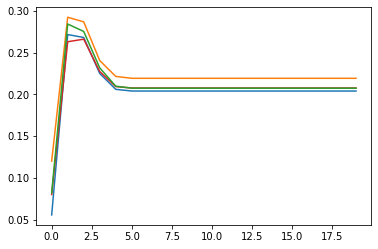

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(mapk_gf, color='tab:blue')
ax.plot(mapk_fim, color='tab:red')
ax.plot(mapk_fim_w, color='tab:orange')
ax.plot(mapk_rt, color='tab:green')

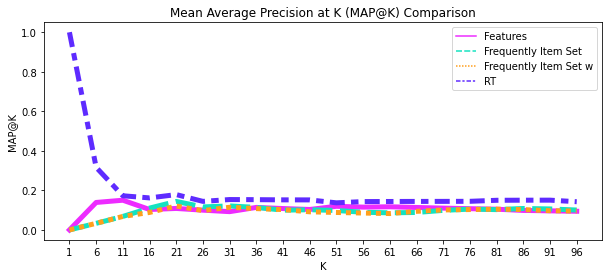

In [58]:
scores = [apk_gf,apk_fim, apk_fim_w, apk_rt]
# index = np.arange(1,100,5)
names = ['Features', 'Frequently Item Set','Frequently Item Set w', 'RT']

fig = plt.figure(figsize=(10, 4))
recmetrics.mapk_plot(scores, model_names=names, k_range=index)

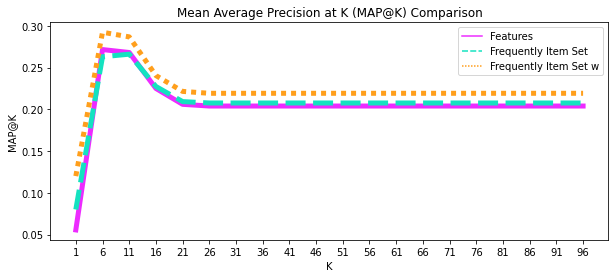

In [59]:
scores = [mapk_gf,mapk_fim, mapk_fim_w], mapk_rt]
names = ['Features', 'Frequently Item Set','Frequently Item Set w']#, 'RT']

fig = plt.figure(figsize=(10, 4))
recmetrics.mapk_plot(scores, model_names=names, k_range=index)

In [60]:
for i in range(len(mapk_fim)):
    print("{:2.3f}  {:2.3f}".format(apk_fim[i],mapk_fim[i]))

0.000  0.080
0.033  0.263
0.068  0.266
0.110  0.227
0.144  0.209
0.116  0.208
0.121  0.208
0.114  0.208
0.100  0.208
0.102  0.208
0.098  0.208
0.089  0.208
0.086  0.208
0.088  0.208
0.099  0.208
0.105  0.208
0.103  0.208
0.108  0.208
0.106  0.208
0.101  0.208


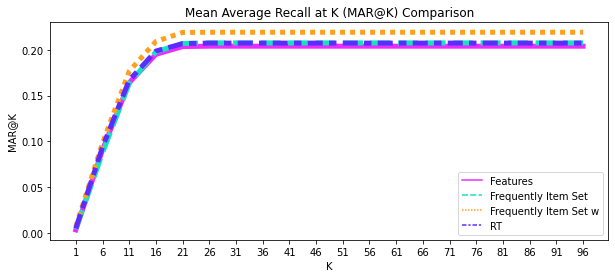

In [61]:
scores = [mark_rt, mark_gf,mark_fim, mark_fim_w]
# index = np.arange(1,100,5)
names = ['RT', 'Features', 'Frequently Item Set','Frequently Item Set w']

fig = plt.figure(figsize=(10, 4))
recmetrics.mark_plot(scores, model_names=names, k_range=index)

In [35]:
# for i in range(len(pred_mark_fim)):
#     print("{:2.3f}  {:2.3f}".format(pred_mark_features[i],pred_mark_fim[i]))
# [pred_mark_fim,pred_mark_rt]

In [62]:
[apk_fim_rev,mapk_fim_rev,mark_fim_rev] = compute_metrics(fim_df[1].values,AC_plants_order_by_metabolit_numbers)
# apk_fim
[apk_fim_w_rev,mapk_fim_w_rev,mark_fim_w_rev] = compute_metrics(fim_w_df[1].values,AC_plants_order_by_metabolit_numbers)
[apk_gf_rev,mapk_gf_rev,mark_gf_rev] = compute_metrics(plants_order_by_features,AC_plants_order_by_metabolit_numbers)
# [apk_rt_rev,mapk_rt_rev,mark_rt_rev] = compute_metrics(AC_plants_order_by_metabolit_numbers, 

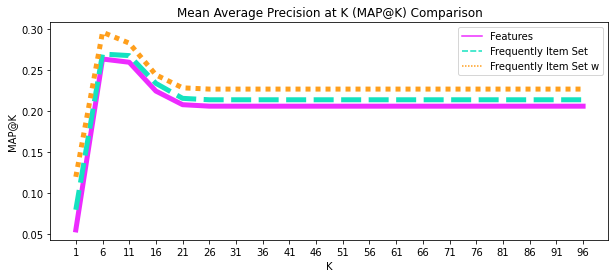

In [63]:
scores = [mapk_gf_rev,mapk_fim_rev, mapk_fim_w_rev]
# index = np.arange(1,30,2)
names = ['Features', 'Frequently Item Set','Frequently Item Set w']

fig = plt.figure(figsize=(10, 4))
recmetrics.mapk_plot(scores, model_names=names, k_range=index)

In [87]:
names = ['RT','Features', 'FIM','FIM Weighted']

results_df = pd.DataFrame(columns = names)
for col in results_df:
    if(col == 'RT'):
        results_df[col] = RT_plants_order_by_metabolit_numbers[:100]
    if(col == 'Features'):
        results_df[col] = plants_order_by_features[:100]
    if(col == 'FIM'):
        results_df[col] = fim_w_df[1].values
    if(col == 'FIM Weighted'):
        results_df[col] = fim_w_df[1].values

print(results_df.head(20))
from pandas import ExcelWriter

writer = ExcelWriter('results/403_best_plants.xlsx')
results_df.to_excel(writer,'Sheet1')
writer.save()

                       RT                   Features                     FIM  \
0    Arabidopsis thaliana          Artemisia biennis         Actaea racemosa   
1       Artemisia biennis          Artemisia sieberi    Berberis orthobotrys   
2       Artemisia sieberi       Arabidopsis thaliana    Hydrastis canadensis   
3   Millettia macrophylla            Punica granatum      Berberis hispanica   
4       Camellia sinensis        Inula lineariifolia       Berberis vulgaris   
5         Artemisia annua              Ginkgo biloba          Papaver rhoeas   
6     Inula lineariifolia                Glycine max     Clematis ganpiniana   
7             Alpinia sp.     Phellodendron amurense     Berberis aquifolium   
8   Glycyrrhiza uralensis            Artemisia annua       Berberis aristata   
9   Dioscorea membranacea      Millettia macrophylla       Chelidonium majus   
10    Dioscorea birmanica                 Morus alba       Artemisia biennis   
11     Glycyrrhiza glabra     Macrosolen

In [90]:
print(results_df.head(20))

                       RT                   Features                     FIM  \
0    Arabidopsis thaliana          Artemisia biennis         Actaea racemosa   
1       Artemisia biennis          Artemisia sieberi    Berberis orthobotrys   
2       Artemisia sieberi       Arabidopsis thaliana    Hydrastis canadensis   
3   Millettia macrophylla            Punica granatum      Berberis hispanica   
4       Camellia sinensis        Inula lineariifolia       Berberis vulgaris   
5         Artemisia annua              Ginkgo biloba          Papaver rhoeas   
6     Inula lineariifolia                Glycine max     Clematis ganpiniana   
7             Alpinia sp.     Phellodendron amurense     Berberis aquifolium   
8   Glycyrrhiza uralensis            Artemisia annua       Berberis aristata   
9   Dioscorea membranacea      Millettia macrophylla       Chelidonium majus   
10    Dioscorea birmanica                 Morus alba       Artemisia biennis   
11     Glycyrrhiza glabra     Macrosolen

In [99]:
# subG.nodes
# ایجاد دیتافریم از روی گراف
df_sg = nx.to_pandas_adjacency(subG)
df_sg

,0,1,2,3,4,5,6,8,10,11,...,391,392,393,394,395,397,398,399,401,402
0,11.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,26.0,0.0,1.0,1.0,1.0,0.0,...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0
401,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,102.0,0.0


In [115]:
# انتخاب زیر مجموعه دیتافریم مرتبط با زیرگراف
indices = subG.nodes()
df_403p = df.copy()
df_sg = df_403p[df_403p.columns[indices]]

In [116]:
met_set_sg = set()
for col in df_sg:
#     print(df_403p[col].dropna().tolist())
    met_set_sg.update(df_sg[col].dropna().tolist())
    
# print(met_list_403)    
# print(len(met_list_403))
# len(np.unique(met_list_403))
print(len(met_set_sg))

7232
